In [89]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # python visualization library on top of matplotlib with easier interface for stats

# Import ML components
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report # eval 

In [90]:
data = pd.read_csv("breast-cancer.csv")
print(data.head())
data.shape

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

(569, 32)

In [33]:
# descriptive stats
print("Dataset Info:")
print(data.info()) # Check data types and missing values

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

In [34]:
print("\nMissing values per column:")
data.isnull().sum()


Missing values per column:


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [35]:
data["diagnosis"] = data["diagnosis"].map({'B': 0, 'M': 1}).astype(int)

In [55]:
print(data["diagnosis"].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


<Axes: >

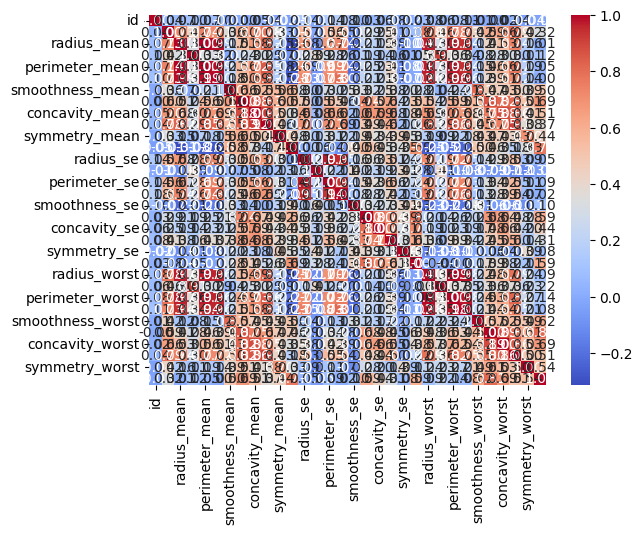

In [60]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
# annot: shows the correlation values also, not just colors
# fmt: controls numeric precision to two decimals 
# cmap: Changes the color scheme to show clear contrast between positive (red) and negative (blue) correlations.

In [61]:
# Let's get the top correlated columns to diagnosis column
corr = data.corr()
corr.nlargest(30,['diagnosis'])['diagnosis']

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [72]:
x=data[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se', 'area_se','compactness_se', 'concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','texture_worst','area_worst']]

y=data[['diagnosis']]

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Accuracy: 0.9298245614035088

Confusion Matrix:
[[104   4]
 [  8  55]]

Classification Report:
              precision    recall  f1-score   support

           0      0.929     0.963     0.945       108
           1      0.932     0.873     0.902        63

    accuracy                          0.930       171
   macro avg      0.930     0.918     0.924       171
weighted avg      0.930     0.930     0.929       171

ROC AUC Score: 0.9626690182245738


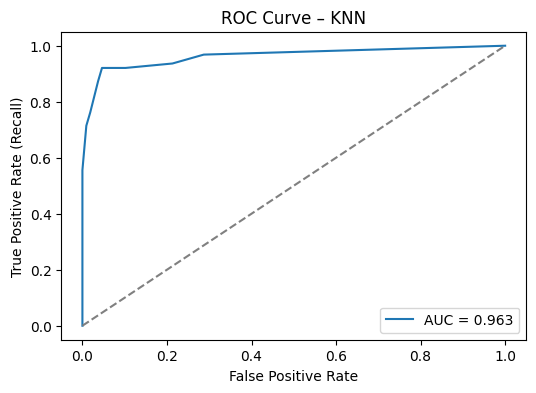

In [91]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train.values.ravel())

# Predict on the test split
y_pred = model.predict(x_test)
# For ROC/AUC we need the probabilities
y_proba = model.predict_proba(x_test)[:, 1]

# 1) Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 2) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# 3) Classification Report (Precision, Recall, F1-Score)
cr = classification_report(y_test, y_pred, digits=3)
print("\nClassification Report:")
print(cr)

# 4) ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# 5) ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – KNN")
plt.legend(loc="lower right")
plt.show()
